In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statistics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import davies_bouldin_score
import scipy.stats as stats
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from umap import UMAP
import pacmap
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from umap import UMAP
from sklearn.impute import SimpleImputer
plt.rc('xtick',labelsize=14)
plt.rc('ytick',labelsize=14)

## UMAP using DNA only features

In [2]:
cols=['Shear', 'Stagger', "Stretch",'Propeller','Opening']
df1=pd.read_csv('NA_csvs/st-nat_all_bps.csv')
df2=pd.read_csv('NA_csvs/st-mm20_all_bps.csv')
df3=pd.read_csv('NA_csvs/st-mm16_19_all_bps.csv')
df4=pd.read_csv('NA_csvs/st-mm17-20_all_bps.csv')
df2.head()

,st_mm20_shear_20,st_mm20_stretch_20,st_mm20_stagger_20,st_mm20_buckle_20,st_mm20_propeller_20,st_mm20_opening_20,st_mm20_shear_19,st_mm20_stretch_19,st_mm20_stagger_19,st_mm20_buckle_19,...,st_mm20_stagger_18,st_mm20_buckle_18,st_mm20_propeller_18,st_mm20_opening_18,st_mm20_shear_17,st_mm20_stretch_17,st_mm20_stagger_17,st_mm20_buckle_17,st_mm20_propeller_17,st_mm20_opening_17
0,-6.67,1.95,1.87,29.60,3.32,73.81,5.82,1.58,-2.02,-46.26,...,1.18,25.62,-13.27,-11.43,-0.73,-0.04,-0.41,2.32,-5.89,-0.57
1,-8.67,3.90,2.00,2.71,17.83,-121.06,0.24,0.08,0.15,-8.66,...,2.08,25.96,-6.29,-20.88,-0.72,0.15,-0.56,4.71,1.72,-2.99
2,-6.14,1.35,2.11,18.03,17.35,81.01,5.52,1.26,-2.23,-48.31,...,1.33,24.90,-17.22,-18.68,0.22,0.39,-0.30,20.80,13.61,5.63
3,-1.19,5.52,1.03,64.37,-9.03,-24.78,1.09,1.04,0.84,-1.82,...,0.54,16.66,-16.79,-28.16,-0.22,-0.01,-0.50,-0.67,14.21,-6.05
4,-5.65,1.89,1.42,14.89,23.23,81.40,0.44,0.04,-0.04,6.40,...,2.46,52.57,-16.50,-15.24,-0.27,0.10,0.04,-30.41,8.07,0.13


In [3]:
#li_rd=[]
li_nat=[]
li_mm20=[]
li_mm16_19=[]
li_mm17_20=[]

print(len(df1), len(df2),len(df3),len(df4)) 
# df1=df1.iloc[:len(df5),:] # trim dataframe as per the number of rows in df5
# df2=df2.iloc[:len(df5),:]
# df3=df3.iloc[:len(df5),:]
# df4=df4.iloc[:len(df5),:]

#df1.columns = range(df1.shape[1]) # remove header
df1.columns = range(df1.shape[1])
df2.columns = range(df2.shape[1])
df3.columns = range(df3.shape[1])
df4.columns = range(df4.shape[1])

# for i in range(len(df1)):
#    li_rd.append('Sp_RNA_DNA')

for i in range(len(df1)):
    li_nat.append('St_native')

for i in range(len(df2)):
    li_mm20.append('St_mm20')

for i in range(len(df3)):
    li_mm16_19.append('St_mm16_19')
    
for i in range(len(df4)):
    li_mm17_20.append('St_mm17-20')
    

#df1['Labels']=li_rd
df1['Labels']=li_nat
df2['Labels']=li_mm20
df3['Labels']=li_mm16_19
df4['Labels']=li_mm17_20


print(len(df1), len(df2),len(df3), len(df4))

485 975 34 178
485 975 34 178


In [4]:
dfs=[df1,df2,df3,df4]
st_df=pd.concat(dfs)
st_df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Labels
0,-3.27,1.92,1.78,1.77,4.04,56.70,-0.09,-0.06,-0.37,4.80,...,40.35,49.16,-44.99,-0.31,0.35,-0.85,52.06,29.25,3.21,St_native
1,-2.59,2.52,0.36,11.63,15.94,61.93,0.04,0.20,0.46,23.73,...,28.59,39.19,-49.74,-0.35,-0.21,-1.52,31.25,20.72,-5.00,St_native
2,-3.27,2.16,0.31,22.36,22.20,53.65,0.48,0.31,0.00,42.10,...,30.54,32.80,-56.59,-0.21,0.20,-1.90,33.39,23.13,6.23,St_native
3,-2.51,2.32,1.26,9.80,-8.25,55.97,-0.01,0.02,0.87,20.11,...,27.98,47.29,-40.07,-0.24,0.46,-1.21,46.94,23.07,12.99,St_native
4,-2.35,3.17,-1.40,-17.81,34.75,69.50,0.09,0.45,0.60,28.09,...,33.36,38.22,-52.06,-0.24,-0.29,-2.30,44.02,-1.39,-11.14,St_native


In [6]:
# Save dataframe
name=['st_all_bp20_shear','st_all_bp20_stretch','st_all_bp20_stagger','st_all_bp20_buckle','st_all_bp20_propeller','st_all_bp20_opening','st_all_bp19_shear','st_all_bp19_stretch','st_all_bp19_stagger','st_all_bp19_buckle','st_all_bp19_propeller','st_all_bp19_opening','st_all_bp18_shear','st_all_bp18_stretch','st_all_bp18_stagger','st_all_bp18_buckle','st_all_bp18_propeller','st_all_bp18_opening','st_all_bp17_shear','st_all_bp17_stretch','st_all_bp17_stagger','st_all_bp17_buckle','st_all_bp17_propeller','st_all_bp17_opening','Label']
st_na=pd.DataFrame()
st_na=pd.concat([df1,df2,df3,df4])
st_na.columns=name
st_na.to_csv('StCas9-NA-str-prop.csv', index=False)
st_na.head()

,st_all_bp20_shear,st_all_bp20_stretch,st_all_bp20_stagger,st_all_bp20_buckle,st_all_bp20_propeller,st_all_bp20_opening,st_all_bp19_shear,st_all_bp19_stretch,st_all_bp19_stagger,st_all_bp19_buckle,...,st_all_bp18_buckle,st_all_bp18_propeller,st_all_bp18_opening,st_all_bp17_shear,st_all_bp17_stretch,st_all_bp17_stagger,st_all_bp17_buckle,st_all_bp17_propeller,st_all_bp17_opening,Label
0,-3.27,1.92,1.78,1.77,4.04,56.70,-0.09,-0.06,-0.37,4.80,...,40.35,49.16,-44.99,-0.31,0.35,-0.85,52.06,29.25,3.21,St_native
1,-2.59,2.52,0.36,11.63,15.94,61.93,0.04,0.20,0.46,23.73,...,28.59,39.19,-49.74,-0.35,-0.21,-1.52,31.25,20.72,-5.00,St_native
2,-3.27,2.16,0.31,22.36,22.20,53.65,0.48,0.31,0.00,42.10,...,30.54,32.80,-56.59,-0.21,0.20,-1.90,33.39,23.13,6.23,St_native
3,-2.51,2.32,1.26,9.80,-8.25,55.97,-0.01,0.02,0.87,20.11,...,27.98,47.29,-40.07,-0.24,0.46,-1.21,46.94,23.07,12.99,St_native
4,-2.35,3.17,-1.40,-17.81,34.75,69.50,0.09,0.45,0.60,28.09,...,33.36,38.22,-52.06,-0.24,-0.29,-2.30,44.02,-1.39,-11.14,St_native


In [7]:
st_na.shape

(1672, 25)

In [8]:
df_na=pd.read_csv('prot_csvs/final_input_output_FnCas9_EMX1_nodt_onlyDNA.csv')
df_na.head()

,st_all_bp20_shear,st_all_bp20_stretch,st_all_bp20_stagger,st_all_bp20_buckle,st_all_bp20_propeller,st_all_bp20_opening,st_all_bp19_shear,st_all_bp19_stretch,st_all_bp19_stagger,st_all_bp19_buckle,...,st_all_bp17_stretch,st_all_bp17_stagger,st_all_bp17_buckle,st_all_bp17_propeller,st_all_bp17_opening,Label,st-ntDNA-tDNA_native,st-ntDNA-tDNA-RuvC_non-native,LIE,sgRNA-tDNA cont
0,-3.27,1.92,1.78,1.77,4.04,56.70,-0.09,-0.06,-0.37,4.80,...,0.35,-0.85,52.06,29.25,3.21,St_native-1,317,0,-1139.9987,840.0
1,-2.59,2.52,0.36,11.63,15.94,61.93,0.04,0.20,0.46,23.73,...,-0.21,-1.52,31.25,20.72,-5.00,St_native-2,283,39,-1016.7305,560.0
2,-3.27,2.16,0.31,22.36,22.20,53.65,0.48,0.31,0.00,42.10,...,0.20,-1.90,33.39,23.13,6.23,St_native-3,279,70,-1114.6532,608.0
3,-2.51,2.32,1.26,9.80,-8.25,55.97,-0.01,0.02,0.87,20.11,...,0.46,-1.21,46.94,23.07,12.99,St_native-4,263,40,-1194.5111,593.0
4,-2.35,3.17,-1.40,-17.81,34.75,69.50,0.09,0.45,0.60,28.09,...,-0.29,-2.30,44.02,-1.39,-11.14,St_native-5,256,49,-1102.8770,631.0


In [205]:
#Drop label column for UMAP and keep it separate
df_na['Label'] = df_na['Label'].str.split('-').str.get(0)
df_na_label=df_na['Label']
df_na_noLabel=df_na.drop(['Label'],axis=1)
print(df_na.shape)
df_na_noLabel.head()

(1414, 29)


,st_all_bp20_shear,st_all_bp20_stretch,st_all_bp20_stagger,st_all_bp20_buckle,st_all_bp20_propeller,st_all_bp20_opening,st_all_bp19_shear,st_all_bp19_stretch,st_all_bp19_stagger,st_all_bp19_buckle,...,st_all_bp17_stretch,st_all_bp17_stagger,st_all_bp17_buckle,st_all_bp17_propeller,st_all_bp17_opening,st-ntDNA-tDNA_native,st-ntDNA-tDNA-RuvC_non-native,LIE,sgRNA-tDNA cont,Dup_RMSD
0,-3.27,1.92,1.78,1.77,4.04,56.70,-0.09,-0.06,-0.37,4.80,...,0.35,-0.85,52.06,29.25,3.21,317,0,-1139.9987,840.0,0.000000
1,-2.59,2.52,0.36,11.63,15.94,61.93,0.04,0.20,0.46,23.73,...,-0.21,-1.52,31.25,20.72,-5.00,283,39,-1016.7305,560.0,2.201710
2,-3.27,2.16,0.31,22.36,22.20,53.65,0.48,0.31,0.00,42.10,...,0.20,-1.90,33.39,23.13,6.23,279,70,-1114.6532,608.0,2.286222
3,-2.51,2.32,1.26,9.80,-8.25,55.97,-0.01,0.02,0.87,20.11,...,0.46,-1.21,46.94,23.07,12.99,263,40,-1194.5111,593.0,2.335084
4,-2.35,3.17,-1.40,-17.81,34.75,69.50,0.09,0.45,0.60,28.09,...,-0.29,-2.30,44.02,-1.39,-11.14,256,49,-1102.8770,631.0,2.265553


## Pair-wise Silhoute Score calculation

In [9]:
st_nat20=pd.concat([df1,df2])
st_nat16_19=pd.concat([df1,df3])
st_nat17_20=pd.concat([df1,df4])
st_nat20.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,Labels
0,-3.27,1.92,1.78,1.77,4.04,56.70,-0.09,-0.06,-0.37,4.80,...,40.35,49.16,-44.99,-0.31,0.35,-0.85,52.06,29.25,3.21,St_native
1,-2.59,2.52,0.36,11.63,15.94,61.93,0.04,0.20,0.46,23.73,...,28.59,39.19,-49.74,-0.35,-0.21,-1.52,31.25,20.72,-5.00,St_native
2,-3.27,2.16,0.31,22.36,22.20,53.65,0.48,0.31,0.00,42.10,...,30.54,32.80,-56.59,-0.21,0.20,-1.90,33.39,23.13,6.23,St_native
3,-2.51,2.32,1.26,9.80,-8.25,55.97,-0.01,0.02,0.87,20.11,...,27.98,47.29,-40.07,-0.24,0.46,-1.21,46.94,23.07,12.99,St_native
4,-2.35,3.17,-1.40,-17.81,34.75,69.50,0.09,0.45,0.60,28.09,...,33.36,38.22,-52.06,-0.24,-0.29,-2.30,44.02,-1.39,-11.14,St_native


In [10]:
df_na['Label']

0          St_native-1
1          St_native-2
2          St_native-3
3          St_native-4
4          St_native-5
             ...      
1409    St_mm17-20-174
1410    St_mm17-20-175
1411    St_mm17-20-176
1412    St_mm17-20-177
1413    St_mm17-20-178
Name: Label, Length: 1414, dtype: object

In [11]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from umap import UMAP

def find_best_umap_parameters(df_st_all):
    df_st_all['Label'] = df_st_all['Label'].str.split('-').str.get(0)
    #df_na_label=df_st_all['Label']
    df_st_noLabel=df_st_all.drop(['Label'],axis=1)
    # Assuming you have your data stored in 'df_fn_all'
    # import plotly.express as px
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(df_st_noLabel))
    # Define the range of values for n_neighbors and min_dist
    n_neighbors_values = list(np.arange(100, 200, 5))  # Modify as desired
    min_dist_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]  # Modify as desired

    best_silhouette_score = float('-inf')
    best_n_neighbors = None
    best_min_dist = None

    for n_neighbors in n_neighbors_values:
        for min_dist in min_dist_values:
            umap_2d = UMAP(n_components=2, init='random', random_state=0,
                           n_neighbors=n_neighbors, min_dist=min_dist, metric='manhattan')
            fn_umap = umap_2d.fit_transform(segmentation_std)
            df_umap = pd.DataFrame(fn_umap, columns=['Comp1', 'Comp2'])
            #df_umap['Label'] = df_fn_all.iloc[:, -1]
            scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
            silhouette = silhouette_score(scores_umap, df_st_all['Label'], metric='manhattan')

            print(f"n_neighbors: {n_neighbors}, min_dist: {min_dist}, Silhouette Score: {silhouette}")

            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_n_neighbors = n_neighbors
                best_min_dist = min_dist

    print("Best Silhouette Score:", best_silhouette_score)
    print("Best n_neighbors:", best_n_neighbors)
    print("Best min_dist:", best_min_dist)

# Example usage:
# df_fn_all = ...  # Your data frame
# find_best_umap_parameters(df_fn_all)


In [12]:
find_best_umap_parameters(df_na) #inplace of st_na

n_neighbors: 100, min_dist: 0.0, Silhouette Score: 0.5105389150518931
n_neighbors: 100, min_dist: 0.1, Silhouette Score: 0.5736310362412335
n_neighbors: 100, min_dist: 0.2, Silhouette Score: 0.511941503082176
n_neighbors: 100, min_dist: 0.3, Silhouette Score: 0.4236326138127722
n_neighbors: 100, min_dist: 0.4, Silhouette Score: 0.44591007750456224
n_neighbors: 100, min_dist: 0.5, Silhouette Score: 0.39213151397951473
n_neighbors: 105, min_dist: 0.0, Silhouette Score: 0.4976207428721206
n_neighbors: 105, min_dist: 0.1, Silhouette Score: 0.5605720542027498
n_neighbors: 105, min_dist: 0.2, Silhouette Score: 0.5359143728803569
n_neighbors: 105, min_dist: 0.3, Silhouette Score: 0.5121503118329526
n_neighbors: 105, min_dist: 0.4, Silhouette Score: 0.4936068419392021
n_neighbors: 105, min_dist: 0.5, Silhouette Score: 0.4892373574984931
n_neighbors: 110, min_dist: 0.0, Silhouette Score: 0.5871797832198395
n_neighbors: 110, min_dist: 0.1, Silhouette Score: 0.43061317978537067
n_neighbors: 110, 

In [15]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
df_na['Label'] = df_na['Label'].str.split('-').str.get(0)
    #df_na_label=df_st_all['Label']
df_na_noLabel=df_na.drop(['Label'],axis=1)
segmentation_std = scaler.fit_transform(imp.fit_transform(df_na_noLabel))
umap_2d = UMAP(n_components=2, init='random', random_state=0,
               n_neighbors=110, min_dist=0.0, metric='manhattan')
fn_umap = umap_2d.fit_transform(segmentation_std)
df_umap = pd.DataFrame(fn_umap, columns=['Comp1', 'Comp2'])
#df_umap['Label'] = df_fn_all.iloc[:, -1]
scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
silhouette = silhouette_score(scores_umap, df_na['Label'], metric='manhattan')

In [16]:
print(silhouette)

5.871797832198395e-01


In [17]:
def calculate_umap_silscore_sp(data, labels):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(data.iloc[:,:-2]))
    
    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=110, min_dist=0.0, metric='manhattan')
    sp_umap = umap_2d.fit_transform(segmentation_std)
    
    cent = pd.DataFrame(sp_umap, columns=['Comp1','Comp2'])
    scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
    score = silhouette_score(scores_umap, labels, metric='manhattan')
    
    print("UMAP Silhouette Score:", score)
    return score

In [18]:
#Silhoute score b/w native native and mm20
calculate_umap_silscore_sp(st_nat20, st_nat20['Labels'])
calculate_umap_silscore_sp(st_nat16_19, st_nat16_19['Labels'])
calculate_umap_silscore_sp(st_nat17_20, st_nat17_20['Labels'])

UMAP Silhouette Score: 5.170103538198446e-01
UMAP Silhouette Score: 4.825104181777263e-01
UMAP Silhouette Score: 8.767665470778836e-01


0.8767665470778836

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from umap import UMAP

# # Assuming st_df is your DataFrame
# # Check for NaNs or infinite values
# if st_df.isnull().values.any():
#     print("DataFrame contains NaN values")
# if np.isinf(st_df.values).any():
#     print("DataFrame contains infinite values")

# Impute missing values
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
segmentation_std = imp.fit_transform(df_na_noLabel)

# Standardize the data
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(segmentation_std)

# Check the shape of the standardized data
print(f"Shape of standardized data: {segmentation_std.shape}")

# Perform UMAP transformation
umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=105, min_dist=0.0, metric='manhattan')
st_umap = umap_2d.fit_transform(segmentation_std)

# Check the shape of the UMAP output
print(f"Shape of UMAP output: {st_umap.shape}")

Shape of standardized data: (1414, 28)
Shape of UMAP output: (1414, 2)


In [28]:
df_na['Label']

0       St_native
1       St_native
2       St_native
3       St_native
4       St_native
          ...    
1409      St_mm17
1410      St_mm17
1411      St_mm17
1412      St_mm17
1413      St_mm17
Name: Label, Length: 1414, dtype: object

In [125]:
# Create a DataFrame for the UMAP results
cent = pd.DataFrame(st_umap, columns=['Comp1', 'Comp2'])
cent['Labels'] = df_na['Label'].values
# Convert Labels to categorical type
cent['Labels'] = cent['Labels'].astype('category')
cent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Comp1   1414 non-null   float32 
 1   Comp2   1414 non-null   float32 
 2   Labels  1414 non-null   category
dtypes: category(1), float32(2)
memory usage: 12.8 KB


<Figure size 432x288 with 0 Axes>

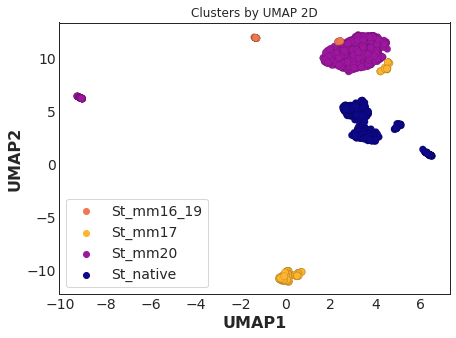

In [127]:
# Set your own colors for the plot

#color_dict=['#0d0887','#9c179e','#ed7953','#fdb42f']
color_dict = {
    'St_native': '#0d0887',
    'St_mm20': '#9c179e',
    'St_mm16_19': '#ed7953',
    'St_mm17': '#fdb42f'
}
# Set style to white and remove top and right spines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_sp, x='Comp1', y='Comp2', hue='Labels', palette=color_dict, edgecolor='black', s=30, linewidth=0.2)
sns.scatterplot(data=cent, x='Comp1', y='Comp2', hue='Labels', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=14)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('StCas9_onlyDNA_UMAP.svg')
plt.show()


In [71]:
cent2_sp.to_csv('StCas9_umap_components_onlyDNA_features_EMX1.csv', index=False)

# UMAP using DNA and Protein features (SASA, RMSD, ROG, sgRNA-tDNA, ntDNA-tDNA, Domains with hybrid conts, LIE, Angle for 300-500ns , 1000 frames)

In [42]:
df_st_both=pd.read_csv('prot_csvs/final_input_output_StCas9_EMX1_nodt_both_prot_DNA.csv')
#df_fn_all=pd.read_csv('final_input_output_FnCas9_EMX1.csv') # replace mm17-20 to mm17_20

In [43]:
df_st_both.head()

,st_all_bp20_shear,st_all_bp20_stretch,st_all_bp20_stagger,st_all_bp20_buckle,st_all_bp20_propeller,st_all_bp20_opening,st_all_bp19_shear,st_all_bp19_stretch,st_all_bp19_stagger,st_all_bp19_buckle,...,RMSD,Angle,st-hy-HNH_native,st-hy-HNH_non-native,st-hy-REC1_native,st-hy-REC1_non-native,st-hy-REC2_native,st-hy-REC2_non-native,st-hy-RuvC_native,st-hy-RuvC_non-native
0,-3.27,1.92,1.78,1.77,4.04,56.70,-0.09,-0.06,-0.37,4.80,...,0.000000,0.0000,384,0,496,0,1247,0,371,0
1,-2.59,2.52,0.36,11.63,15.94,61.93,0.04,0.20,0.46,23.73,...,2.926891,106.0687,288,89,373,115,909,327,274,182
2,-3.27,2.16,0.31,22.36,22.20,53.65,0.48,0.31,0.00,42.10,...,3.016246,105.9507,244,100,374,150,911,294,267,165
3,-2.51,2.32,1.26,9.80,-8.25,55.97,-0.01,0.02,0.87,20.11,...,2.644768,104.9899,227,105,411,162,919,292,280,217
4,-2.35,3.17,-1.40,-17.81,34.75,69.50,0.09,0.45,0.60,28.09,...,2.788990,100.8157,244,137,379,173,909,420,267,181


In [44]:
find_best_umap_parameters(df_st_both)

n_neighbors: 100, min_dist: 0.0, Silhouette Score: 0.6697618390143036
n_neighbors: 100, min_dist: 0.1, Silhouette Score: 0.6915423445719954
n_neighbors: 100, min_dist: 0.2, Silhouette Score: 0.5709307325743147
n_neighbors: 100, min_dist: 0.3, Silhouette Score: 0.598148682350876
n_neighbors: 100, min_dist: 0.4, Silhouette Score: 0.6018477493000335
n_neighbors: 100, min_dist: 0.5, Silhouette Score: 0.6102562352189541
n_neighbors: 105, min_dist: 0.0, Silhouette Score: 0.7013117728040584
n_neighbors: 105, min_dist: 0.1, Silhouette Score: 0.674318327923365
n_neighbors: 105, min_dist: 0.2, Silhouette Score: 0.6210145302660637
n_neighbors: 105, min_dist: 0.3, Silhouette Score: 0.6434520185005936
n_neighbors: 105, min_dist: 0.4, Silhouette Score: 0.6170030863964051
n_neighbors: 105, min_dist: 0.5, Silhouette Score: 0.4965811160433267
n_neighbors: 110, min_dist: 0.0, Silhouette Score: 0.6483410730220366
n_neighbors: 110, min_dist: 0.1, Silhouette Score: 0.5531891590080924
n_neighbors: 110, min_

In [45]:
df_st_both['Label']=df_st_both['Label'].str.split('-', expand=True)[0]
# df_st_both.head()

In [50]:
st_nat=df_st_both[df_st_both['Label']=='St_native']
st_mm20=df_st_both[df_st_both['Label']=='St_mm20']
st_mm16_19=df_st_both[df_st_both['Label']=='St_mm16_19']
st_mm17_20=df_st_both[df_st_both['Label']=='St_mm17']
st_nat_20=pd.concat([st_nat,st_mm20])
st_nat_16_19=pd.concat([st_nat,st_mm16_19])
st_nat_17_20=pd.concat([st_nat,st_mm17_20])

nat_20=st_nat_20['Label']
nat_16_19=st_nat_16_19['Label']
nat_17_20=st_nat_17_20['Label']

st_nat_20=st_nat_20.drop(['Label'],axis=1)
st_nat_16_19=st_nat_16_19.drop(['Label'],axis=1)
st_nat_17_20=st_nat_17_20.drop(['Label'],axis=1)

st_nat_20.columns = range(st_nat_20.shape[1])
#st_nat_16_19=st_nat_16_19.iloc[:,:-1]
st_nat_16_19.columns = range(st_nat_16_19.shape[1])
#st_nat_17_20=st_nat_17_20.iloc[:,:-1]
st_nat_17_20.columns = range(st_nat_17_20.shape[1])
st_nat_17_20.tail()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
1409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.088636,106.3150,254,249,296,125,349,556,255,160
1410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.344854,107.5338,281,180,287,152,365,493,263,226
1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.080060,104.7593,283,211,309,182,370,489,243,195
1412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.039549,100.4832,302,222,320,193,369,529,268,180
1413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.383956,106.2672,271,196,294,175,349,498,244,139


In [51]:
def calculate_umap_silscore_st(data, labels):
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    scaler = StandardScaler()
    segmentation_std = scaler.fit_transform(imp.fit_transform(data))
    
    umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=115, min_dist=0.0, metric='manhattan')
    st_umap = umap_2d.fit_transform(segmentation_std)
    
    cent = pd.DataFrame(st_umap, columns=['Comp1','Comp2'])
    scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
    score = silhouette_score(scores_umap, labels, metric='manhattan')
    
    print("UMAP Silhouette Score:", score)
    return score

In [49]:
# #Silhoute score b/w native native and mm20
# calculate_umap_silscore_st(st_nat_20, nat_20)
# calculate_umap_silscore_st(st_nat_16_19, nat_16_19)
# calculate_umap_silscore_st(st_nat_17_20, nat_17_20)

In [119]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
df_st_both['Label'] = df_st_both['Label'].str.split('-').str.get(0)
    #df_st_both_label=df_st_all['Label']
df_st_both_noLabel=df_st_both.drop(['Label'],axis=1)
segmentation_std = scaler.fit_transform(imp.fit_transform(df_st_both_noLabel))
umap_2d = UMAP(n_components=2, init='random', random_state=0,
               n_neighbors=115, min_dist=0.0, metric='manhattan')
st_umap = umap_2d.fit_transform(segmentation_std)


            # df_umap = pd.DataFrame(fn_umap, columns=['Comp1', 'Comp2'])
            # #df_umap['Label'] = df_fn_all.iloc[:, -1]
            # scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
            # silhouette = silhouette_score(scores_umap, df_st_all['Label'], metric='manhattan')

df_umap = pd.DataFrame(st_umap, columns=['Comp1', 'Comp2'])
#df_umap['Label'] = df_fn_all.iloc[:, -1]
scores_umap = df_umap[['Comp1', 'Comp2']].to_numpy()
silhouette = silhouette_score(scores_umap, df_st_both['Label'], metric='manhattan')

In [120]:
# Create a DataFrame for the UMAP results
print(silhouette)
cent2_st = pd.DataFrame(st_umap, columns=['Comp1', 'Comp2'])
cent2_st['Labels'] = df_st_both['Label'].values
# Convert Labels to categorical type
cent2_st['Labels'] = cent['Labels'].astype('category')
cent2_st.info()

7.587556309905827e-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Comp1   1414 non-null   float32 
 1   Comp2   1414 non-null   float32 
 2   Labels  1414 non-null   category
dtypes: category(1), float32(2)
memory usage: 12.8 KB


In [121]:
cent2_st.to_csv('StCas9_umap_components_all_features_EMX1.csv', index=False)

<Figure size 432x288 with 0 Axes>

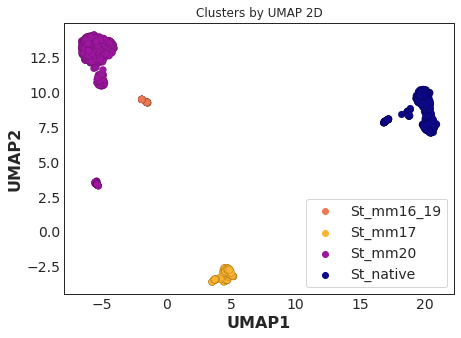

In [123]:
color_dict = {
    'St_native': '#0d0887',
    'St_mm20': '#9c179e',
    'St_mm16_19': '#ed7953',
    'St_mm17': '#fdb42f'
}

# Set style to white and remove top and right stines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_st, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=30, linewidth=0.2)
sns.scatterplot(data=cent2_st, x='Comp1', y='Comp2', hue='Labels', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=14)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('stCas9_all_UMAP.svg')

## UMAP using only protein features

In [98]:
st_prot=pd.read_csv('prot_csvs/final_input_output_FnCas9_EMX1_nodt_only_protein.csv')

In [92]:
st_prot.head()

,SASA,Label,ROG,RMSD,Angle,st-hy-HNH_native,st-hy-HNH_non-native,st-hy-REC1_native,st-hy-REC1_non-native,st-hy-REC2_native,st-hy-REC2_non-native,st-hy-RuvC_native,st-hy-RuvC_non-native
0,45776.867968,St_native-1,35.684057,0.000000,106.2647,384,0,496,0,1247,0,371,0
1,45895.147959,St_native-2,36.119654,2.926891,105.3623,288,89,373,115,909,327,274,182
2,45961.685820,St_native-3,35.935293,3.016246,105.3363,244,100,374,150,911,294,267,165
3,46024.385117,St_native-4,36.042500,2.644768,108.0241,227,105,411,162,919,292,280,217
4,45841.320359,St_native-5,35.996524,2.788990,106.0093,244,137,379,173,909,420,267,181


In [93]:
#st_prot['Angle']=st_prot['Angle'].astype(float)
st_prot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2867 entries, 0 to 2866
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SASA                   2867 non-null   float64
 1   Label                  2867 non-null   object 
 2   ROG                    2867 non-null   float64
 3   RMSD                   2867 non-null   float64
 4   Angle                  2867 non-null   float64
 5   st-hy-HNH_native       2867 non-null   int64  
 6   st-hy-HNH_non-native   2867 non-null   int64  
 7   st-hy-REC1_native      2867 non-null   int64  
 8   st-hy-REC1_non-native  2867 non-null   int64  
 9   st-hy-REC2_native      2867 non-null   int64  
 10  st-hy-REC2_non-native  2867 non-null   int64  
 11  st-hy-RuvC_native      2867 non-null   int64  
 12  st-hy-RuvC_non-native  2867 non-null   int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 291.3+ KB


In [80]:
find_best_umap_parameters(st_prot)

n_neighbors: 100, min_dist: 0.0, Silhouette Score: 0.9259514888796553
n_neighbors: 100, min_dist: 0.1, Silhouette Score: 0.9266364191117761
n_neighbors: 100, min_dist: 0.2, Silhouette Score: 0.8759036069184274
n_neighbors: 100, min_dist: 0.3, Silhouette Score: 0.8342601762927083
n_neighbors: 100, min_dist: 0.4, Silhouette Score: 0.9250181126947146
n_neighbors: 100, min_dist: 0.5, Silhouette Score: 0.885816079782217
n_neighbors: 105, min_dist: 0.0, Silhouette Score: 0.7556577846364703
n_neighbors: 105, min_dist: 0.1, Silhouette Score: 0.9217330502210654
n_neighbors: 105, min_dist: 0.2, Silhouette Score: 0.8533512085296802
n_neighbors: 105, min_dist: 0.3, Silhouette Score: 0.9124712192071269
n_neighbors: 105, min_dist: 0.4, Silhouette Score: 0.856968264328698
n_neighbors: 105, min_dist: 0.5, Silhouette Score: 0.9003136642023252
n_neighbors: 110, min_dist: 0.0, Silhouette Score: 0.9295005614360721
n_neighbors: 110, min_dist: 0.1, Silhouette Score: 0.9178428292723545
n_neighbors: 110, min_

In [83]:
# st_prot['System']=st_prot['Frames'].str.split('-', expand=True)[0]
# st_prot.drop('Frames', axis=1, inplace=True)


In [48]:
sp_prot.System.unique()

array(['Sp_native', 'Sp_mm20', 'Sp_mm17', 'Sp_mm16_19'], dtype=object)

In [84]:
# st_nat=st_prot[st_prot['System']=='St_native']
# st_mm20=st_prot[st_prot['System']=='St_mm20']
# st_mm16_19=st_prot[st_prot['System']=='St_mm16_19']
# st_mm17_20=st_prot[st_prot['System']=='St_mm17']
# st_nat_20=pd.concat([st_nat,st_mm20])
# st_nat_16_19=pd.concat([st_nat,st_mm16_19])
# st_nat_17_20=pd.concat([st_nat,st_mm17_20])
# #st_nat_20=st_nat_20.iloc[:,:-1]
# st_nat_20.columns = range(st_nat_20.shape[1])
# #st_nat_16_19=st_nat_16_19.iloc[:,:-1]
# st_nat_16_19.columns = range(st_nat_16_19.shape[1])
# #st_nat_17_20=st_nat_17_20.iloc[:,:-1]
# st_nat_17_20.columns = range(st_nat_17_20.shape[1])
# st_nat_17_20.tail()

In [85]:
# from umap import UMAP
# import plotly.express as px
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# scaler=StandardScaler()
# # Remove header 
# st_prot.columns = range(st_prot.shape[1])

In [86]:
# def calculate_umap_silscore_st(data, labels):
#     imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#     scaler = StandardScaler()
#     segmentation_std = scaler.fit_transform(imp.fit_transform(data.iloc[:,:-1]))
    
#     umap_2d = UMAP(n_components=2, init='random', random_state=0, n_neighbors=140, min_dist=0.1, metric='manhattan')
#     st_umap = umap_2d.fit_transform(segmentation_std)
    
#     cent = pd.DataFrame(st_umap, columns=['Comp1','Comp2'])
#     scores_umap = cent[['Comp1','Comp2']].to_numpy()
    
#     score = silhouette_score(scores_umap, labels, metric='manhattan')
    
#     print("UMAP Silhouette Score:", score)
#     return score

In [41]:
# #Silhoute score b/w native native and mm20
# calculate_umap_silscore_st(st_nat_20, st_nat_20.iloc[:,-1])
# calculate_umap_silscore_st(st_nat_16_19, st_nat_16_19.iloc[:,-1])
# calculate_umap_silscore_st(st_nat_17_20, st_nat_17_20.iloc[:,-1])

UMAP Silhouette Score: 0.7414238674306884
UMAP Silhouette Score: 0.23930221178120056
UMAP Silhouette Score: 0.27075369610351024


0.27075369610351024

In [99]:
st_prot['Label'].str.split('-').str.get(0)

0        St_native
1        St_native
2        St_native
3        St_native
4        St_native
           ...    
2862    St_mm16_19
2863    St_mm16_19
2864    St_mm16_19
2865    St_mm16_19
2866    St_mm16_19
Name: Label, Length: 2867, dtype: object

In [114]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
scaler = StandardScaler()
st_prot_label = st_prot['Label'].str.split('-').str.get(0)
    #df_st_both_label=df_st_all['Label']
st_prot_noLabel=st_prot.drop(['Label'],axis=1)
st_prot['Label']=st_prot_label
segmentation_std = scaler.fit_transform(imp.fit_transform(st_prot_noLabel))

umap_2d=UMAP(n_components=2, init='random', random_state=0, n_neighbors=140, min_dist=0.1, metric='manhattan') # best sil score at this n_neighbours
st_tsne = umap_2d.fit_transform(segmentation_std) 
proj_2d = umap_2d.fit_transform(segmentation_std)
cent2_st=pd.DataFrame(st_tsne, columns=['Comp1','Comp2'])
cent2_st['Label']=list(st_prot_label)
scores_tsne=cent2_st[['Comp1','Comp2']].to_numpy()# convert dataframe to numpy array
print(silhouette_score(scores_tsne, st_prot_label ))

9.441784e-01


In [102]:
cent2_st.to_csv('stCas9_umap_components_only_protein_features_EMX1.csv', index=False)

<Figure size 432x288 with 0 Axes>

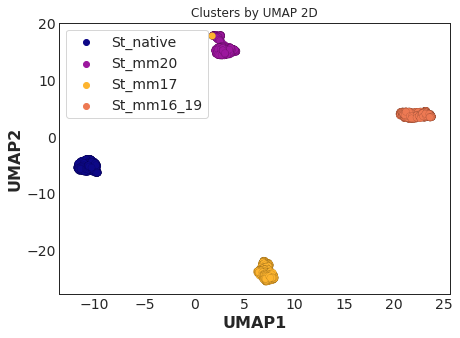

In [117]:
color_dict = {
    'St_native': '#0d0887',
    'St_mm20': '#9c179e',
    'St_mm16_19': '#ed7953',
    'St_mm17': '#fdb42f'
}

# Set style to white and remove top and right stines
sns.set_style("white")
sns.despine()

# Create the scatter plot
plt.figure(figsize=(7, 5))
#sns.scatterplot(data=cent2_st, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=30, linewidth=0.2)
sns.scatterplot(data=cent2_st, x='Comp1', y='Comp2', hue='Label', palette=color_dict, edgecolor='black', s=50, linewidth=0.08)
# Increase the width of the axis lines
ax = plt.gca()
ax.spines['left'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['top'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)
plt.title('Clusters by UMAP 2D')
plt.legend(fontsize=14)
plt.xlabel('UMAP1', fontsize=16,  fontweight='bold')
plt.ylabel('UMAP2', fontsize=16,  fontweight='bold')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.savefig('StCas9_only_prot_UMAP.svg')

## Feature Ranking Analysis

In [64]:
xts=pd.read_csv('feature-ranking/xt_imp_spcas9.csv')
xtf=pd.read_csv('feature-ranking/xt_imp_fncas9.csv')

borf=pd.read_csv('feature-ranking/fn_all_bor.csv')
bors=pd.read_csv('feature-ranking/sp_bor_imp.csv')

In [65]:
borf=borf[borf['Decision']=='Accepted']
bors=bors[bors['Decision']=='Accepted']

In [66]:
xts=xts.rename(columns={'Importance':'Sp_Imp'})
xtf=xtf.rename(columns={'Importance':'Fn_Imp'})
merge=xtf.merge(xts, how="inner", on="Feature")
merge.head()

,Feature,Fn_Imp,Sp_Imp
0,REC3_non-native,0.112936,0.025967
1,REC1_native,0.077129,0.021254
2,REC3_native,0.053388,0.024475
3,bp20_stretch,0.046909,0.017099
4,HNH_native,0.044188,0.054893


In [67]:
bors.head()

,Methods,value,Decision
0,bp20_shear,0.140058,Accepted
1,bp20_shear,0.092623,Accepted
2,bp20_shear,0.213747,Accepted
3,bp20_shear,0.259432,Accepted
4,bp20_shear,0.135817,Accepted


In [68]:
mean_sp=bors.groupby('Methods')['value'].mean()
mean_sp['Methods']=mean_sp.index
sp_features=list(mean_sp.index)
sp_value=[]
for i in range(len(mean_sp)):
    sp_value.append(mean_sp[i])

bors2=pd.DataFrame({'Feature':sp_features,'Sp_MeanValue':sp_value})
bors2.head()

,Feature,Sp_MeanValue
0,HNH_native,1.065754
1,HNH_non-native,2.155538
2,REC1_native,-0.135608
3,REC1_non-native,0.175508
4,REC2_native,1.880067


In [56]:
bors2

,Features,Sp_MeanValue
0,HNH_native,1.065754
1,HNH_non-native,2.155538
2,REC1_native,-0.135608
3,REC1_non-native,0.175508
4,REC2_native,1.880067
5,REC2_non-native,-0.035337
6,REC3_native,0.999246
7,REC3_non-native,0.117148
8,RMSD,-0.17204
9,ROG,0.01798


In [69]:
mean_fn=borf.groupby('Methods')['value'].mean()
mean_fn['Methods']=mean_fn.index
fn_features=list(mean_fn.index)
fn_value=[]
for i in range(len(mean_fn)):
    fn_value.append(mean_fn[i])

borf2=pd.DataFrame({'Feature':fn_features,'Fn_MeanValue':fn_value})
borf2

,Feature,Fn_MeanValue
0,Angle,-0.164554
1,HNH_native,3.771764
2,HNH_non-native,0.690181
3,REC1_native,0.704049
4,REC1_non-native,0.265063
5,REC2_native,1.505695
6,REC2_non-native,-0.045126
7,REC3_native,0.492306
8,REC3_non-native,4.882853
9,RMSD,2.565523


In [70]:
merge2=bors2.merge(borf2, how="inner", on=['Feature'])
merge2=merge2[:-1]
merge2

,Feature,Sp_MeanValue,Fn_MeanValue
0,HNH_native,1.065754,3.771764
1,HNH_non-native,2.155538,0.690181
2,REC1_native,-0.135608,0.704049
3,REC1_non-native,0.175508,0.265063
4,REC2_native,1.880067,1.505695
5,REC2_non-native,-0.035337,-0.045126
6,REC3_native,0.999246,0.492306
7,REC3_non-native,0.117148,4.882853
8,RMSD,-0.17204,2.565523
9,ROG,0.01798,0.374215


/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/home/gayatrip/miniconda3/envs/gmxMMPBSA/lib/python3.9/site-packages/matplotlib/collections.py:982: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


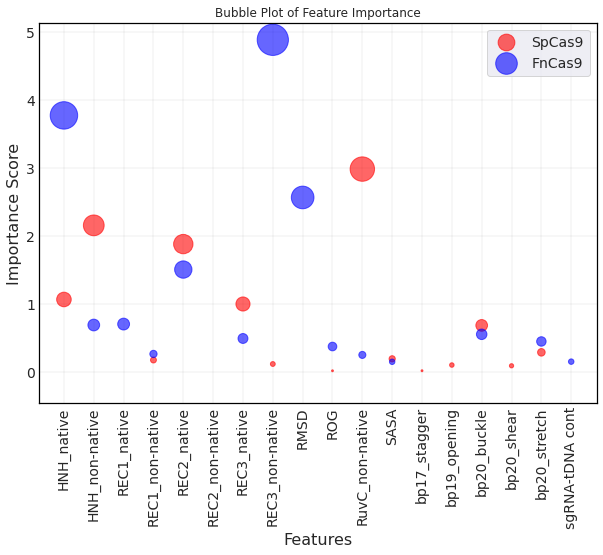

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# Bubble plot
plt.figure(figsize=(10, 7))
merge2['Sp_MeanValue']=merge2['Sp_MeanValue'].astype(np.float64)
merge2['Fn_MeanValue']=merge2['Fn_MeanValue'].astype(np.float64)
# Plot for class 1
plt.scatter(merge2['Feature'], merge2['Sp_MeanValue'], s=np.array(merge2['Sp_MeanValue']) * 200, c='red', alpha=0.6, label='SpCas9')

# Plot for class 2
plt.scatter(merge2['Feature'], merge2['Fn_MeanValue'], s=np.array(merge2['Fn_MeanValue']) * 200, c='blue', alpha=0.6, label='FnCas9')


ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)

# Customize the plot
plt.title('Bubble Plot of Feature Importance')
plt.xlabel('Features',fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Importance Score',fontsize=16)
# plt.legend()
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
plt.legend(fontsize=12)
plt.legend(fontsize=14)
plt.savefig('figures/boruta_feature-ranking-fn-sp.svg')
# Show the plot
plt.show()

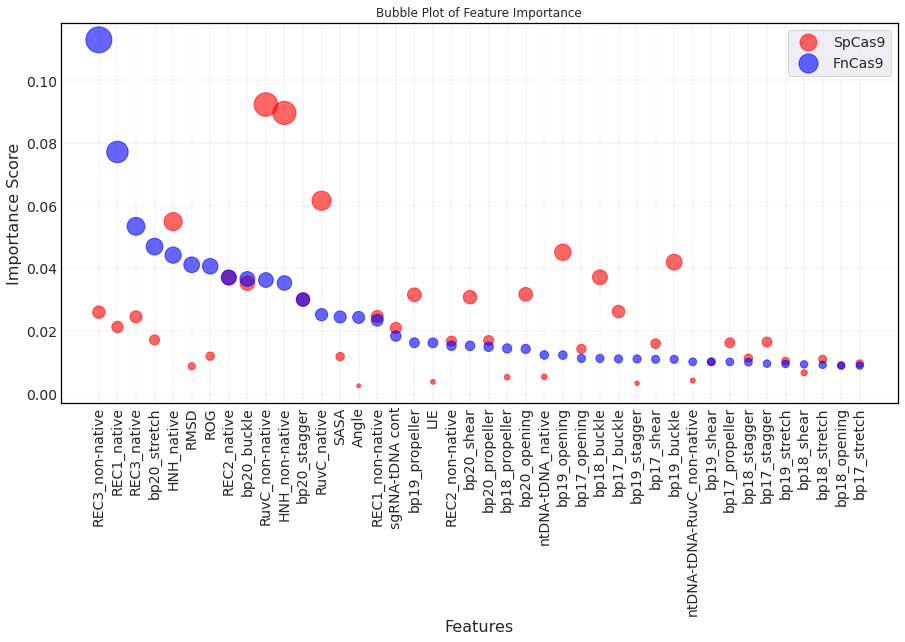

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Bubble plot
plt.figure(figsize=(15, 7), facecolor='white')

# Plot for class 1
plt.scatter(merge['Feature'], merge['Sp_Imp'], s=np.array(merge['Sp_Imp']) * 6000, c='red', alpha=0.6, label='SpCas9')

# Plot for class 2
plt.scatter(merge['Feature'], merge['Fn_Imp'], s=np.array(merge['Fn_Imp']) * 6000, c='blue', alpha=0.6, label='FnCas9')


ax = plt.gca()
ax.set_facecolor('xkcd:white')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
#ax.tick_params(which='both', width=2)
ax.tick_params(which='both', width=2, direction='in', length=6)

# Customize the plot
plt.title('Bubble Plot of Feature Importance')
plt.xlabel('Features',fontsize=16)
plt.xticks(rotation=90, fontsize=14)
plt.ylabel('Importance Score',fontsize=16)
# plt.legend()
# plt.grid(True)

plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.legend(fontsize=12)
plt.legend(fontsize=14)
plt.savefig('figures/extra-tree_feature-ranking-fn-sp.svg')
# Show the plot
plt.show()

In [78]:
merge.to_csv('feature-ranking/extra-tree-sp-fn.csv', index=False)

In [79]:
merge2.to_csv('feature-ranking/boruta-shap-sp-fn.csv', index=False)

In [80]:
merge3=merge2.merge(merge, how="inner", on='Feature')
merge3.head()

,Feature,Sp_MeanValue,Fn_MeanValue,Fn_Imp,Sp_Imp
0,HNH_native,1.065754,3.771764,0.044188,0.054893
1,HNH_non-native,2.155538,0.690181,0.035290,0.089583
2,REC1_native,-0.135608,0.704049,0.077129,0.021254
3,REC1_non-native,0.175508,0.265063,0.023396,0.024583
4,REC2_native,1.880067,1.505695,0.037083,0.036961


In [81]:
merge.head()

,Feature,Fn_Imp,Sp_Imp
0,REC3_non-native,0.112936,0.025967
1,REC1_native,0.077129,0.021254
2,REC3_native,0.053388,0.024475
3,bp20_stretch,0.046909,0.017099
4,HNH_native,0.044188,0.054893


In [82]:
merge2.head()

,Feature,Sp_MeanValue,Fn_MeanValue
0,HNH_native,1.065754,3.771764
1,HNH_non-native,2.155538,0.690181
2,REC1_native,-0.135608,0.704049
3,REC1_non-native,0.175508,0.265063
4,REC2_native,1.880067,1.505695


In [83]:
merge3.to_csv('feature-ranking/extra-tree-boruta-shap-sp-fn.csv', index=False)